In [3]:
import os
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')

In [38]:
malware_dataset = pd.read_csv('/content/sample_data/MalwareArtifacts.csv')

# New Section

In [40]:
malware_dataset.head()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1


In [10]:
target=malware_dataset.iloc[:,8].values

In [41]:
target

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
listofcolumns= malware_dataset.columns

In [43]:

samples= malware_dataset.iloc[:,[0,1,2,3,4,5,6,7]].values

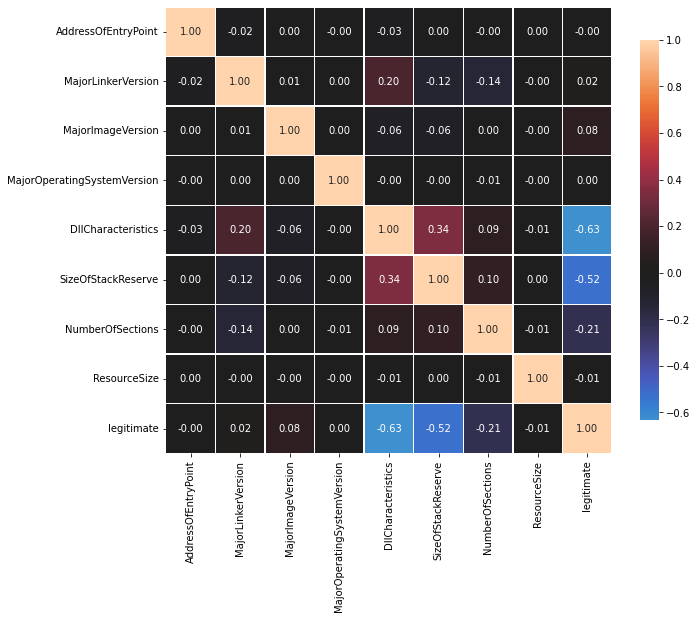

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def correlation_heatmap(dataset):
    correlations = dataset.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(malware_dataset)

### Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


training_samples, testing_Samples, training_targets, testing_targets = train_test_split(samples, target, test_size=0.25, random_state=16)


lr_model = LogisticRegression()
lr_model.fit(training_samples, training_targets)

#Predictions
y_pred = lr_model.predict(testing_Samples)
    
#Predicted values
accuracy = 100.0 * accuracy_score(testing_targets, y_pred)
print('Accuracy of Logistic Regression model using', accuracy)
    

Accuracy of Logistic Regression model using 70.08818136841187


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

for i in range(0, 7):
  for j in range(i+1,8):
    samplesLR = malware_dataset.iloc[:,[i, j]].values
    #Split Data
    training_samples, testing_Samples, training_targets, testing_targets = train_test_split(samplesLR, target, test_size=0.25, random_state=16)

    #Train Model
    lr_model = LogisticRegression()
    lr_model.fit(training_samples, training_targets)

    #Predictions
    y_pred = lr_model.predict(testing_Samples)
    
    #Predicted values
    accuracy = 100.0 * accuracy_score(testing_targets, y_pred)
    print('Accuracy of Logistic Regression model using', i, listofcolumns[i], 'and', j,  listofcolumns[j], 'is', accuracy)
    

Accuracy of Logistic Regression model using 0 AddressOfEntryPoint and 1 MajorLinkerVersion is 69.82625651174297
Accuracy of Logistic Regression model using 0 AddressOfEntryPoint and 2 MajorImageVersion is 75.56241087279183
Accuracy of Logistic Regression model using 0 AddressOfEntryPoint and 3 MajorOperatingSystemVersion is 69.82625651174297
Accuracy of Logistic Regression model using 0 AddressOfEntryPoint and 4 DllCharacteristics is 69.82625651174297
Accuracy of Logistic Regression model using 0 AddressOfEntryPoint and 5 SizeOfStackReserve is 70.96126422397485
Accuracy of Logistic Regression model using 0 AddressOfEntryPoint and 6 NumberOfSections is 69.82625651174297
Accuracy of Logistic Regression model using 0 AddressOfEntryPoint and 7 ResourceSize is 69.82625651174297
Accuracy of Logistic Regression model using 1 MajorLinkerVersion and 2 MajorImageVersion is 70.13765606356043
Accuracy of Logistic Regression model using 1 MajorLinkerVersion and 3 MajorOperatingSystemVersion is 87.5

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


training_samples, testing_Samples, training_targets, testing_targets = train_test_split(samples, target, test_size=0.25, random_state=16)


KNNmodel = KNeighborsClassifier(n_neighbors=2)
KNNmodel.fit(training_samples, training_targets)

#Predictions
y_pred = KNNmodel.predict(testing_Samples)
    
#Predicted values
accuracy = 100.0 * accuracy_score(testing_targets, y_pred)
print('Accuracy of KNN model using', accuracy)
    

Accuracy of KNN model using 96.98495387212246


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


for i in range(0, 7):
  for j in range(i+1,8):
    samplesKNN = malware_dataset.iloc[:,[i, j]].values
    #Split Data
    training_samples, testing_Samples, training_targets, testing_targets = train_test_split(samplesKNN, target, test_size=0.25, random_state=16)

    #Train Model
    KNNmodel = KNeighborsClassifier(n_neighbors=2)
    KNNmodel.fit(training_samples, training_targets)

    #Predictions
    predictions = KNNmodel.predict(testing_Samples)

    
    #Predicted values
    accuracy = 100.0 * accuracy_score(testing_targets, predictions)
    print('Accuracy of KNN model using', i, listofcolumns[i], 'and', j,  listofcolumns[j], 'is', accuracy)

    

Accuracy of KNN model using 0 AddressOfEntryPoint and 1 MajorLinkerVersion is 92.63700125141877
Accuracy of KNN model using 0 AddressOfEntryPoint and 2 MajorImageVersion is 93.22778731701639
Accuracy of KNN model using 0 AddressOfEntryPoint and 3 MajorOperatingSystemVersion is 92.39835860423155
Accuracy of KNN model using 0 AddressOfEntryPoint and 4 DllCharacteristics is 94.41518000058205
Accuracy of KNN model using 0 AddressOfEntryPoint and 5 SizeOfStackReserve is 95.48907191292454
Accuracy of KNN model using 0 AddressOfEntryPoint and 6 NumberOfSections is 92.11897209045138
Accuracy of KNN model using 0 AddressOfEntryPoint and 7 ResourceSize is 94.94193999010506
Accuracy of KNN model using 1 MajorLinkerVersion and 2 MajorImageVersion is 93.57119990687116
Accuracy of KNN model using 1 MajorLinkerVersion and 3 MajorOperatingSystemVersion is 90.77733476906958
Accuracy of KNN model using 1 MajorLinkerVersion and 4 DllCharacteristics is 92.65737318471523
Accuracy of KNN model using 1 Major

##Naive Bayes

In [24]:
from sklearn.utils import gen_batches
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


training_samples, testing_Samples, training_targets, testing_targets = train_test_split(samples, target, test_size=0.25, random_state=16)


gnb = GaussianNB()
gnb.fit(training_samples, training_targets)

#Predictions
y_pred = gnb.predict(testing_Samples)
    
#Predicted values
accuracy = 100.0 * accuracy_score(testing_targets, y_pred)
print('Accuracy of Naive Bayes model using', accuracy)
    

Accuracy of Naive Bayes model using 34.082244404994036


In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
training_samples, testing_Samples, training_targets, testing_targets = train_test_split(samples, target, test_size=0.25, random_state=16)



for i in range(0, 7):
  for j in range(i+1,8):
    samplesNB = malware_dataset.iloc[:,[i, j]].values
    #Split Data
    training_samples, testing_Samples, training_targets, testing_targets = train_test_split(samplesNB, target, test_size=0.25, random_state=16)

    #Train Model
    gnb = GaussianNB()
    gnb.fit(training_samples, training_targets)

    #Predictions
    predictions = gnb.predict(testing_Samples)

    
    #Predicted values
    accuracy = 100.0 * accuracy_score(testing_targets, predictions)
    print('Accuracy of Naive Bayes model using', i, listofcolumns[i], 'and', j,  listofcolumns[j], 'is', accuracy)


Accuracy of Naive Bayes model using 0 AddressOfEntryPoint and 1 MajorLinkerVersion is 30.73251651581735
Accuracy of Naive Bayes model using 0 AddressOfEntryPoint and 2 MajorImageVersion is 70.15220744448648
Accuracy of Naive Bayes model using 0 AddressOfEntryPoint and 3 MajorOperatingSystemVersion is 30.73251651581735
Accuracy of Naive Bayes model using 0 AddressOfEntryPoint and 4 DllCharacteristics is 84.75306306568493
Accuracy of Naive Bayes model using 0 AddressOfEntryPoint and 5 SizeOfStackReserve is 34.55661942318326
Accuracy of Naive Bayes model using 0 AddressOfEntryPoint and 6 NumberOfSections is 30.73251651581735
Accuracy of Naive Bayes model using 0 AddressOfEntryPoint and 7 ResourceSize is 30.322167573702746
Accuracy of Naive Bayes model using 1 MajorLinkerVersion and 2 MajorImageVersion is 70.15511772067168
Accuracy of Naive Bayes model using 1 MajorLinkerVersion and 3 MajorOperatingSystemVersion is 54.09912400686825
Accuracy of Naive Bayes model using 1 MajorLinkerVersion 

References:

https://machinelearningmastery.com/calculate-feature-importance-with-python/


https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/


In [25]:
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')

In [27]:
network_logs = pd.read_csv('/content/sample_data/network-logs.csv')

In [28]:
network_logs.head(10)

,REMOTE_PORT,LATENCY,THROUGHPUT,ANOMALY
0,21,15.942875,16.202998,0
1,20,12.666451,15.899084,1
2,80,13.894550,12.958008,0
3,21,13.620813,15.459475,0
4,21,15.705485,15.339565,0
5,23,15.593190,15.612381,0
6,21,15.489068,15.640874,0
7,80,15.527048,15.635680,0
8,21,14.075067,15.765315,0
9,53,12.953650,15.823285,0


In [46]:
from sklearn import tree

from sklearn.model_selection import train_test_split
samples = network_logs.iloc[:,[0,1,2]].values
target=network_logs.iloc[:,3].values

In [49]:
samples

array([[ 21.        ,  15.94287532,  16.20299807],
       [ 20.        ,  12.66645095,  15.89908374],
       [ 80.        ,  13.89454962,  12.95800822],
       ...,
       [ 80.        ,  14.0760142 ,  15.84206443],
       [443.        ,  10.88221341,  13.46166188],
       [ 21.        ,  14.00920312,  15.97657577]])

In [50]:
target

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [45]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = tree_classifier = tree.DecisionTreeClassifier()

eclf = VotingClassifier( estimators=[('rf', clf2), ('dt', clf3)], voting='hard')

for clf, label in zip([clf2, clf3, eclf], ['Random Forest', 'Decision Tree', 'Ensemble']):
  scores = cross_val_score(clf, training_samples, training_targets, scoring='accuracy', cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.96 (+/- 0.00) [Random Forest]
Accuracy: 0.96 (+/- 0.00) [Decision Tree]
Accuracy: 0.96 (+/- 0.00) [Ensemble]


Reference:

https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier


https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/